In [1]:
!pip install tensorflow
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from keras import datasets, layers, models

In [2]:
(x_train,y_train),(x_test,y_test)=load_data()


In [3]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)
x_train=x_train
x_test=x_test

In [6]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [7]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [9]:
import matplotlib.pyplot as plt

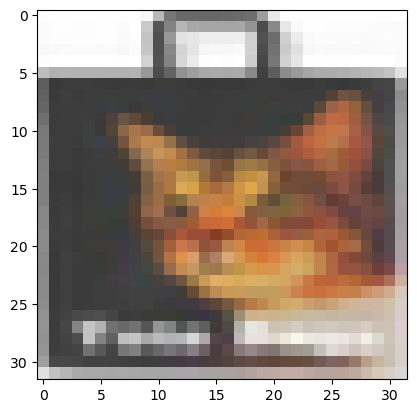

In [41]:
plt.imshow(x_train[3000].astype(int))
plt.show()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, Activation, Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [16]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))    


In [17]:
model.compile(optimizer="Adam",loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
model.fit(x=x_train, 
          y=y_train_ohe, 
          batch_size=100,
          validation_data=(x_test, y_test_ohe),
          epochs=20)

Epoch 1/20
500/500 [==============================] - 189s 370ms/step - loss: 1.8418 - accuracy: 0.3779 - val_loss: 1.5689 - val_accuracy: 0.4342
Epoch 2/20
500/500 [==============================] - 178s 355ms/step - loss: 1.2153 - accuracy: 0.5626 - val_loss: 1.9824 - val_accuracy: 0.3962
Epoch 3/20
500/500 [==============================] - 132s 264ms/step - loss: 1.0347 - accuracy: 0.6319 - val_loss: 0.9414 - val_accuracy: 0.6666
Epoch 4/20
500/500 [==============================] - 151s 301ms/step - loss: 0.9154 - accuracy: 0.6774 - val_loss: 1.0071 - val_accuracy: 0.6479
Epoch 5/20
500/500 [==============================] - 157s 314ms/step - loss: 0.8378 - accuracy: 0.7079 - val_loss: 0.7277 - val_accuracy: 0.7448
Epoch 6/20
500/500 [==============================] - 169s 337ms/step - loss: 0.7715 - accuracy: 0.7296 - val_loss: 0.7078 - val_accuracy: 0.7548
Epoch 7/20
500/500 [==============================] - 188s 376ms/step - loss: 0.7292 - accuracy: 0.7455 - val_loss: 0.7200 -

In [19]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']



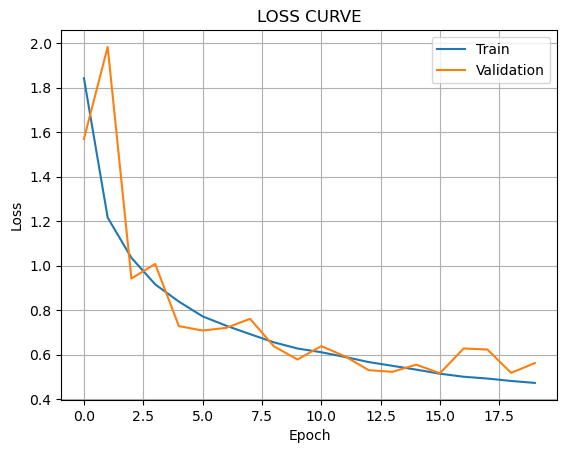

In [21]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

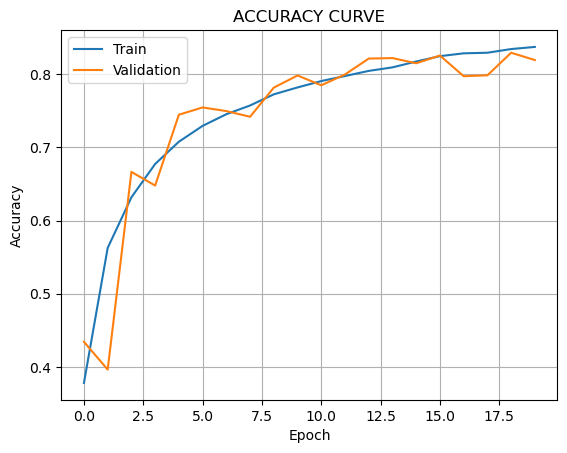

In [22]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()


In [23]:
import numpy as np

In [24]:
preds = model.predict(x_test)


313/313 [==============================] - 9s 27ms/step


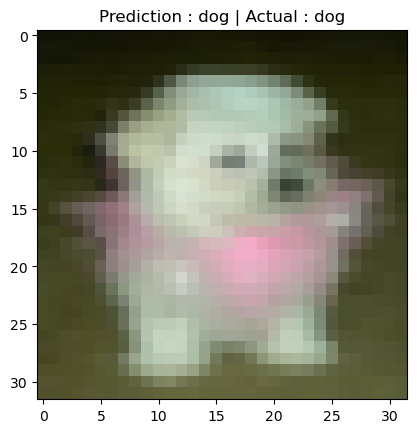

In [25]:
n = 3000
plt.imshow(x_test[n].astype(int))
plt.title(f"Prediction : {classes[np.argmax(preds[n])]} | Actual : {classes[y_test[n]]}")
plt.show()

In [33]:
##pretrained model VGG16

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import numpy as np

In [34]:
##imagenet_classes = pd.read_json("C:\Users\Senthil Kumar\Downloads\cifar-10-python.tar.gz")
images=load_data()

In [35]:
pretrained_model = VGG16()
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [36]:
print(images)


((array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
      

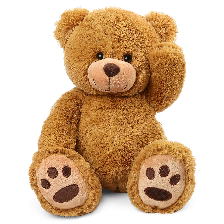

In [38]:
image_for_classification =load_img(path =r"C:\Users\Senthil Kumar\Desktop\teddybear.jpg",target_size=(224,224))
image_for_classification

In [39]:
image_for_classification = np.array(image_for_classification)
image_for_classification = preprocess_input(image_for_classification)
image_for_classification = image_for_classification.reshape(1, 224, 224, 3)

In [40]:
preds = pretrained_model.predict(image_for_classification)
##images["probability"] = np.round(preds.flatten(), 3)
##images.sort_values(by="probability", ascending=False)

##convert the probabilities to class labels
label=decode_predictions(preds)

##retrieve the mostly likely results e.g. highest probability
label=label[0][0]

##print the classification
print('%s (%.2f%%)' % (label[1],label[2]*100))

image_for_classification=preprocess_input(image_for_classification)

1/1 [==============================] - 0s 238ms/step
teddy (99.27%)
